Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [6]:
# загрузим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sys

In [17]:
# загрузим датасет
df = pd.read_csv('/Users/a2v/Desktop/Python/DA/5/Задания/Минипроект/transaction_data.csv')

In [18]:
# ознакомимся с количеством данных, их типами 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [19]:
# поменяем тип данных столбца date на дату
df['date'] = pd.to_datetime(df.date)

In [20]:
# убедимся, что замена удалась
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5315 non-null   datetime64[ns]
 1   name         5315 non-null   object        
 2   transaction  5315 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 124.7+ KB


In [21]:
# посмотрим на количество пропущенных значений
df.isnull().sum()

date           0
name           0
transaction    0
dtype: int64

In [22]:
# посмотрим на колчиство дублей
df.duplicated().sum()

0

In [23]:
# посмотрим описательную статистику
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692
first,2020-03-02 00:00:00,NaN,NaN
last,2020-03-02 01:29:05,NaN,NaN


Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Сколько транзакций завершились ошибкой?

In [29]:
# посмотрим на соотношение наблюдений к тому или иному уровню транзакций
transaction = df.transaction.value_counts()

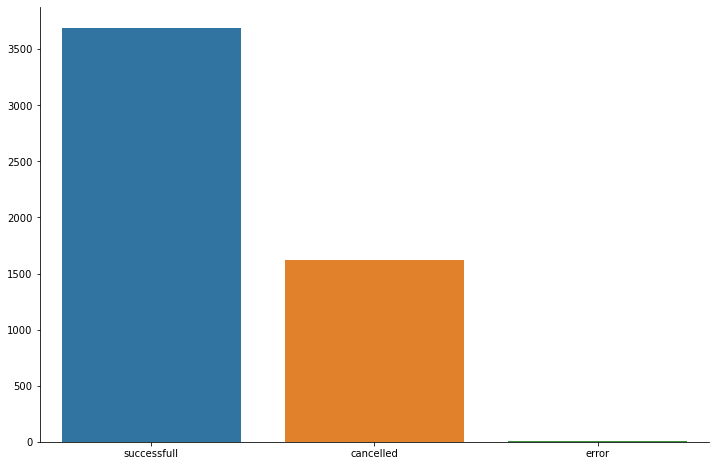

Транзакции завершившиеся ошибкой - 4


In [37]:
# представим графически соотношение
plt.figure(figsize=(12, 8))
sns.barplot(transaction.index, transaction.values)
sns.despine()
plt.show()
print(f'Транзакции завершившиеся ошибкой - {transaction.values[2]}')

Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

In [44]:
# сгруппируем успешные транзакции каждого пользователя
users_successfull_transaction = df.query('transaction == "successfull"') \
            .groupby('name') \
            .agg({'transaction':'count'})

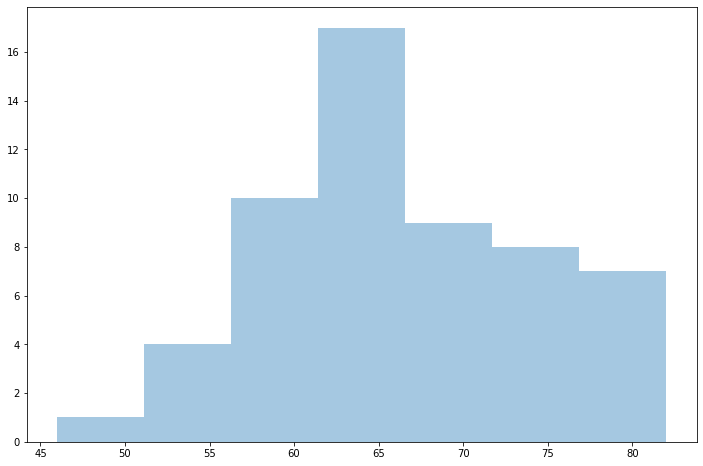

In [56]:
# визуализируем данные построив distplot
plt.figure(figsize=(12, 8))
sns.distplot(users_successfull_transaction, kde=False)
plt.show()

Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)
Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

In [58]:
df_updated = pd.read_csv('/Users/a2v/Desktop/Python/DA/5/Задания/Минипроект/transaction_data_updated.csv')

In [59]:
df_updated.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [64]:
# построим сводную таблицу, в которой рассмотрим количество совершенных транзакций пользователями по минутам
user_vs_minute_pivot = pd.pivot_table(df_updated,
                      columns = 'name',
                      index = 'minute',
                      values = 'transaction',
                      aggfunc='count', 
                      fill_value=0)
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3,4,2,3,4,4,2,1,2,2,...,0,3,1,1,4,1,3,0,0,1
1,4,4,0,4,2,5,4,4,4,3,...,4,5,3,2,3,3,0,0,3,2
2,1,2,4,4,2,1,3,2,3,3,...,4,1,3,3,0,1,2,1,3,1
3,3,0,2,0,5,2,1,3,2,2,...,1,5,5,2,4,0,3,4,1,0
4,3,0,0,3,1,1,2,3,2,1,...,1,2,2,1,1,2,2,3,0,1


Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

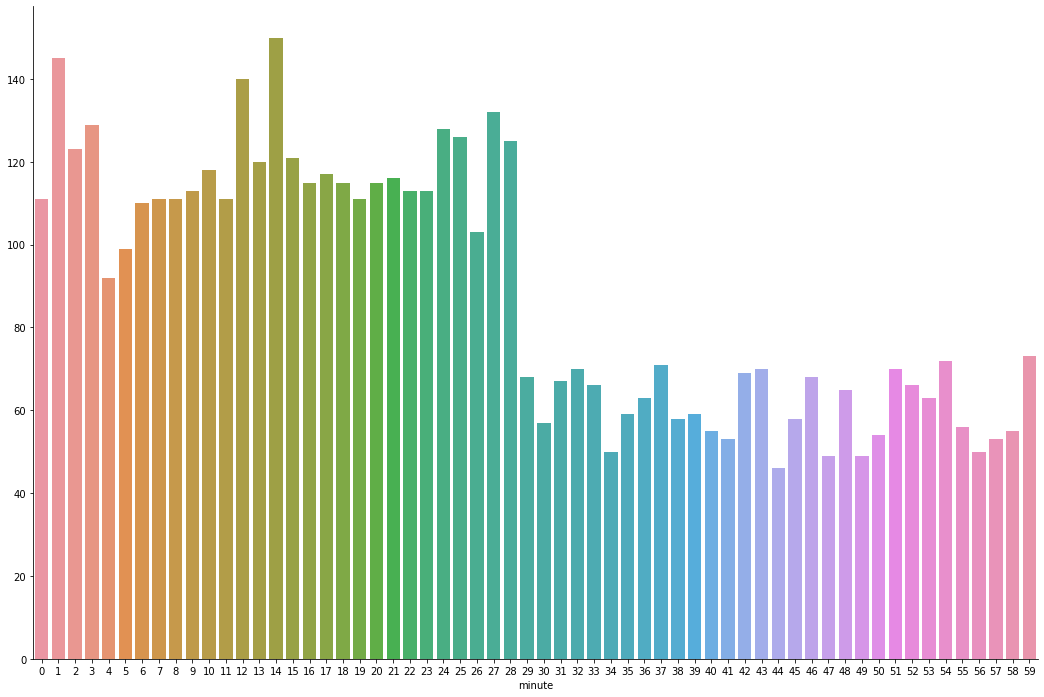

In [70]:
plt.figure(figsize=(18, 12))
sns.barplot(user_vs_minute_pivot.index, user_vs_minute_pivot.sum(axis=1))
sns.despine()
plt.show()

Вывод - значения в первой половине данных значительно больше чем во второй, это может быть связано связано с:
- проблемами выгрузки данных
- проблемами занесения значений в таблицу

In [73]:
# приведем столбец даты к формату даты
df_updated['date'] = pd.to_datetime(df_updated['date'])

In [76]:
# добавим новый столбец с расчетами по минутам
df_updated['true_minute'] = df_updated['date'].dt.minute + df_updated['date'].dt.hour * 60

In [78]:
user_vs_true_minute_pivot = pd.pivot_table(df_updated,
                      columns = 'name',
                      index = 'true_minute',
                      values = 'transaction',
                      aggfunc='count', 
                      fill_value=0)

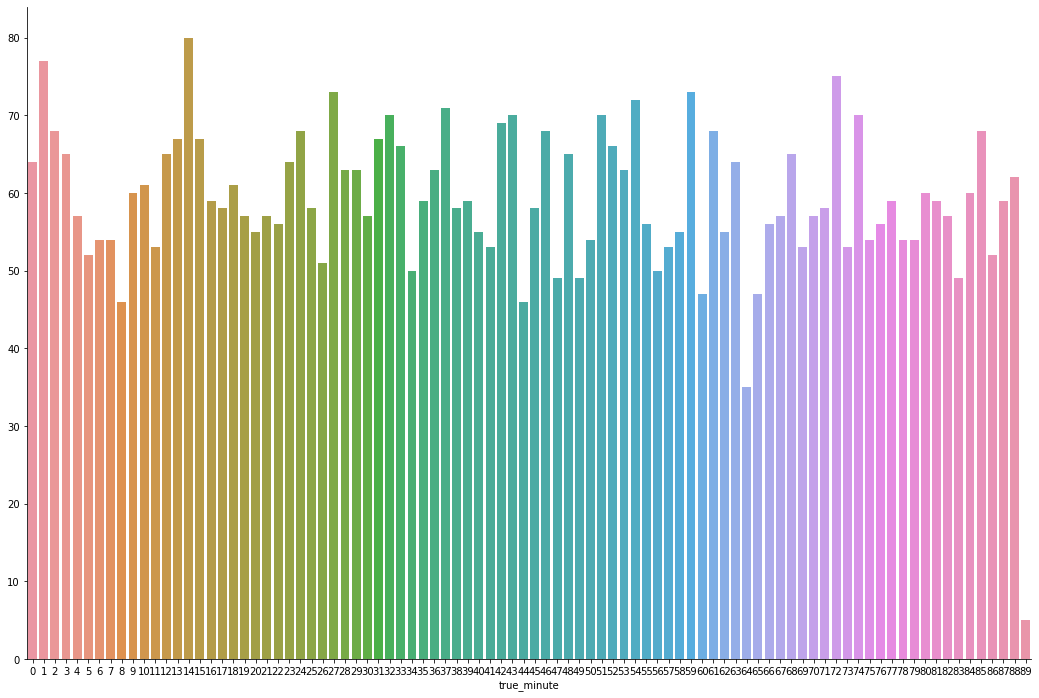

In [80]:
plt.figure(figsize=(18, 12))
sns.barplot(user_vs_true_minute_pivot.index, user_vs_true_minute_pivot.sum(axis=1))
sns.despine()
plt.show()